#Lab 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for data visualization 

In [ ]:
data = pd.read_csv('drive/MyDrive/CarData.csv')
data.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [ ]:
data.describe()

,Unnamed: 0,Price,Age,MetColor,Automatic,CC,Weight
count,1436.000000,1436.000000,1336.000000,1286.000000,1436.000000,1436.000000,1436.00000
mean,717.500000,10730.824513,55.672156,0.674961,0.055710,1566.827994,1072.45961
std,414.681806,3626.964585,18.589804,0.468572,0.229441,187.182436,52.64112
min,0.000000,4350.000000,1.000000,0.000000,0.000000,1300.000000,1000.00000
25%,358.750000,8450.000000,43.000000,0.000000,0.000000,1400.000000,1040.00000
50%,717.500000,9900.000000,60.000000,1.000000,0.000000,1600.000000,1070.00000
75%,1076.250000,11950.000000,70.000000,1.000000,0.000000,1600.000000,1085.00000
max,1435.000000,32500.000000,80.000000,1.000000,1.000000,2000.000000,1615.00000


In [ ]:
len(data)

1436

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 123.5+ KB


##Data Preprocessing

In [ ]:
data = data.drop(columns='Unnamed: 0',axis=True)
data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


Seprate Input and Output attributes

In [ ]:
X = data.iloc[1:,:]
y = data.Price
print('X: \n',X)
print('\ny:\n',y)

X: 
       Price   Age     KM FuelType   HP  MetColor  Automatic    CC Doors  Weight
1     13750  23.0  72937   Diesel   90       1.0          0  2000     3    1165
2     13950  24.0  41711   Diesel   90       NaN          0  2000     3    1165
3     14950  26.0  48000   Diesel   90       0.0          0  2000     3    1165
4     13750  30.0  38500   Diesel   90       0.0          0  2000     3    1170
5     12950  32.0  61000   Diesel   90       0.0          0  2000     3    1170
...     ...   ...    ...      ...  ...       ...        ...   ...   ...     ...
1431   7500   NaN  20544   Petrol   86       1.0          0  1300     3    1025
1432  10845  72.0     ??   Petrol   86       0.0          0  1300     3    1015
1433   8500   NaN  17016   Petrol   86       0.0          0  1300     3    1015
1434   7250  70.0     ??      NaN   86       1.0          0  1300     3    1015
1435   6950  76.0      1   Petrol  110       0.0          0  1600     5    1114

[1435 rows x 10 columns]

y:
 0   

###Handling null values

In [ ]:
X.dropna(axis=0,how='all',inplace=True) #this removes rows which has all null column
print("\nNew Data :\n",X)


New Data :
       Price   Age     KM FuelType   HP  MetColor  Automatic    CC Doors  Weight
1     13750  23.0  72937   Diesel   90       1.0          0  2000     3    1165
2     13950  24.0  41711   Diesel   90       NaN          0  2000     3    1165
3     14950  26.0  48000   Diesel   90       0.0          0  2000     3    1165
4     13750  30.0  38500   Diesel   90       0.0          0  2000     3    1170
5     12950  32.0  61000   Diesel   90       0.0          0  2000     3    1170
...     ...   ...    ...      ...  ...       ...        ...   ...   ...     ...
1431   7500   NaN  20544   Petrol   86       1.0          0  1300     3    1025
1432  10845  72.0     ??   Petrol   86       0.0          0  1300     3    1015
1433   8500   NaN  17016   Petrol   86       0.0          0  1300     3    1015
1434   7250  70.0     ??      NaN   86       1.0          0  1300     3    1015
1435   6950  76.0      1   Petrol  110       0.0          0  1600     5    1114

[1435 rows x 10 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X.isnull().sum(axis=0)

Price          0
Age          100
KM             0
FuelType     100
HP             0
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [ ]:
X['Age'] = X['Age'].fillna(X['Age'].mean())
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1,13750,23.000000,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.000000,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.000000,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.000000,38500,Diesel,90,0.0,0,2000,3,1170
5,12950,32.000000,61000,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,55.696629,20544,Petrol,86,1.0,0,1300,3,1025
1432,10845,72.000000,??,Petrol,86,0.0,0,1300,3,1015
1433,8500,55.696629,17016,Petrol,86,0.0,0,1300,3,1015
1434,7250,70.000000,??,NaN,86,1.0,0,1300,3,1015


In [ ]:
X.isnull().sum(axis=0)

Price          0
Age            0
KM             0
FuelType     100
HP             0
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [ ]:
X.MetColor.value_counts()

1.0    867
0.0    418
Name: MetColor, dtype: int64

In [ ]:
X['MetColor'] = X['MetColor'].fillna(value=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X.isnull().sum() #all null values are either removed or replaced by mean value

Price          0
Age            0
KM             0
FuelType     100
HP             0
MetColor       0
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [ ]:
X.Doors.value_counts()

5       673
3       621
4       137
2         2
four      1
five      1
Name: Doors, dtype: int64

In [ ]:
X['Doors'] = X['Doors'].replace({'five':5,'four':4})
X.Doors.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


5    673
3    621
4    137
2      2
5      1
4      1
Name: Doors, dtype: int64

###Data Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
dummy = pd.get_dummies(X['FuelType'])
dummy

,CNG,Diesel,Petrol
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
...,...,...,...
1431,0,0,1
1432,0,0,1
1433,0,0,1
1434,0,0,0


In [ ]:
one_hot_encoded = pd.concat([X,dummy],axis=1)
one_hot_encoded.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,CNG,Diesel,Petrol
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165,0,1,0
2,13950,24.0,41711,Diesel,90,1.0,0,2000,3,1165,0,1,0
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165,0,1,0
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170,0,1,0
5,12950,32.0,61000,Diesel,90,0.0,0,2000,3,1170,0,1,0


In [ ]:
y = one_hot_encoded.Price
y.head()

1    13750
2    13950
3    14950
4    13750
5    12950
Name: Price, dtype: int64

In [ ]:
X = one_hot_encoded.drop(['Price'],axis=1)
X.head()

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,CNG,Diesel,Petrol
1,23.0,72937,Diesel,90,1.0,0,2000,3,1165,0,1,0
2,24.0,41711,Diesel,90,1.0,0,2000,3,1165,0,1,0
3,26.0,48000,Diesel,90,0.0,0,2000,3,1165,0,1,0
4,30.0,38500,Diesel,90,0.0,0,2000,3,1170,0,1,0
5,32.0,61000,Diesel,90,0.0,0,2000,3,1170,0,1,0


###Feature Selection

In [ ]:
corr_data = X.corr()
corr_data

,Age,MetColor,Automatic,CC,Weight,CNG,Diesel,Petrol
Age,1.000000,-0.084027,0.030669,-0.113667,-0.440815,0.006598,-0.065177,0.059506
MetColor,-0.084027,1.000000,-0.011343,0.031137,0.045885,0.005570,-0.012011,-0.012591
Automatic,0.030669,-0.011343,1.000000,-0.069060,0.057609,-0.024973,-0.080837,0.058397
CC,-0.113667,0.031137,-0.069060,1.000000,0.650529,0.018341,0.729102,-0.560408
Weight,-0.440815,0.045885,0.057609,0.650529,1.000000,0.051870,0.514966,-0.424027
CNG,0.006598,0.005570,-0.024973,0.018341,0.051870,1.000000,-0.034193,-0.219523
Diesel,-0.065177,-0.012011,-0.080837,0.729102,0.514966,-0.034193,1.000000,-0.710584
Petrol,0.059506,-0.012591,0.058397,-0.560408,-0.424027,-0.219523,-0.710584,1.000000


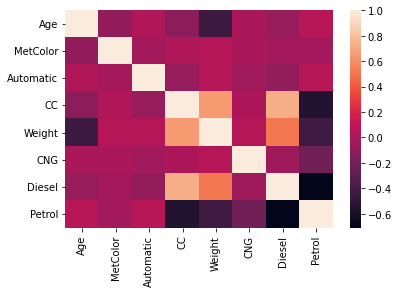

In [ ]:
sns.heatmap(corr_data)


correlation between CC and Weight is more as compared to correlation with other.